# Name: Ahmad Ayman M. Bahaa El-Din
# Semester: Spring 2021
# ID: 17P6053
# Dot Matrix Using Window Scoring 

In [1]:
# !pip install matplotlib

In [2]:
# ! jupyter-nbconvert --to PDFviaHTML DotMatrixUsingWindowScoring.ipynb

###  Inputting the 2 DNA Sequences

In [3]:
seq1 = "ACGTTGACCTGTAACCTC"
seq2 = "ACCTTGTCCTCTTTGCCC"

#Sequences to List 
seq1_list = list(seq1)
seq2_list = list(seq2)

### Specifying Algorithm Tuneable Parameters 

In [4]:
windowSize = 9
step = 3
threshold = 4

## FInding Matches Considering: Window Size, Threshhold, Steps

### Helper Functions

In [5]:
def countMatches(seq1,seq2):
    count = 0
    matchIterations = min([len(seq1), len(seq2)])
    for index in range(matchIterations):
        if seq1[index] == seq2[index]:
            count += 1
    return count

def constructEmptyMatrix(cols, rows):
    M = []
    for columnIndex in range(cols):
        M.append([])
    for columnIndex in range(cols):
        for rowIndex in range(rows):
            M[columnIndex].append(None)
    return M

def sliceSequenceWithWindowShifts(sequence, windowSize, step):
    slices = []
    start = 0
    for numSlices in range(len(sequence)):
        if start+windowSize > len(sequence):
            break
        slice = sequence[start:start+windowSize]
        slices.append(slice)
        start += step
    return slices

### Implementation 

In [6]:
# Slicing Sequences according to Window Size tuneable parameter 
seq1_slicedWindowLists = sliceSequenceWithWindowShifts(seq1_list, windowSize, step)
seq2_slicedWindowLists = sliceSequenceWithWindowShifts(seq2_list, windowSize, step)

# Constructing Empty 2-D Matrix for Matches 
matches = constructEmptyMatrix(len(seq1),len(seq2))

for seq1_window, columnIndex in zip(seq1_slicedWindowLists, range(0,len(seq1))):
    for seq2_window, rowIndex in zip(seq2_slicedWindowLists, range(0,len(seq2))):
        print("Win1: \t", seq1_window)
        print("Win2: \t",seq2_window)
        windowMatches = countMatches(seq1_window, seq2_window)          
        print("Match Count: ", windowMatches)
        print("--------------------")
        if windowMatches >= threshold:
            rowIndexToPutADotIn = int(rowIndex*step + windowSize/2)
            columnIndexToPutADotIn = int(columnIndex*step + windowSize/2)
            matches[columnIndexToPutADotIn][rowIndexToPutADotIn] = rowIndexToPutADotIn    

Win1: 	 ['A', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'C']
Win2: 	 ['A', 'C', 'C', 'T', 'T', 'G', 'T', 'C', 'C']
Match Count:  7
--------------------
Win1: 	 ['A', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'C']
Win2: 	 ['T', 'T', 'G', 'T', 'C', 'C', 'T', 'C', 'T']
Match Count:  3
--------------------
Win1: 	 ['A', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'C']
Win2: 	 ['T', 'C', 'C', 'T', 'C', 'T', 'T', 'T', 'G']
Match Count:  2
--------------------
Win1: 	 ['A', 'C', 'G', 'T', 'T', 'G', 'A', 'C', 'C']
Win2: 	 ['T', 'C', 'T', 'T', 'T', 'G', 'C', 'C', 'C']
Match Count:  6
--------------------
Win1: 	 ['T', 'T', 'G', 'A', 'C', 'C', 'T', 'G', 'T']
Win2: 	 ['A', 'C', 'C', 'T', 'T', 'G', 'T', 'C', 'C']
Match Count:  1
--------------------
Win1: 	 ['T', 'T', 'G', 'A', 'C', 'C', 'T', 'G', 'T']
Win2: 	 ['T', 'T', 'G', 'T', 'C', 'C', 'T', 'C', 'T']
Match Count:  7
--------------------
Win1: 	 ['T', 'T', 'G', 'A', 'C', 'C', 'T', 'G', 'T']
Win2: 	 ['T', 'C', 'C', 'T', 'C', 'T', 'T', 'T', 'G']
Match Count:  3
------

## Graphing 

In [7]:
import matplotlib.pyplot as plt

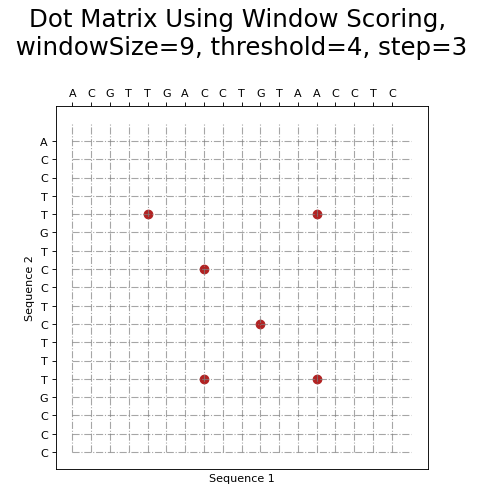

In [8]:
fig, ax = plt.subplots(figsize=(6,6), dpi= 80)

#Vertical & horizontal Grids
ax.hlines(y=range(len(seq2_list)), 
          xmin=0, xmax=len(seq1_list), 
          color='gray', alpha=0.7, linewidth=1,linestyles='dashdot')
ax.vlines(x=range(len(seq2_list)), 
          ymin=0, ymax=len(seq2_list), 
          color='gray', alpha=0.7, linewidth=1,linestyles='dashdot')

# Plot Dot Points Matrix 
# iterate for each value in seq 1, plot its corrisponding seq 2 matches 
reversedMatches = reversed(matches)
for seq1_index, matchesVector in zip(range(len(seq1_list)), reversedMatches):
    ax.scatter(x=[seq1_index]*len(seq2_list),y=list(reversed(matchesVector)), s=60, color='firebrick')

# Graph Titles & labels 
ax.set_title(f'Dot Matrix Using Window Scoring, \n windowSize={windowSize}, threshold={threshold}, step={step} \n', fontdict={'size':22})
ax.set_xlabel('Sequence 1')
ax.set_ylabel('Sequence 2')
ax.set_xticks(range(len(seq1_list)))
ax.set_yticks(range(len(seq2_list)))
ax.xaxis.tick_top()

 # to reorder vertical axis for sequence 2
ax.set_yticklabels(list(reversed(seq2_list)))
ax.set_xticklabels(seq1_list)
plt.show()